In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import typing as T
from tqdm import tqdm
import torch
import numpy as np

from evo.dataset import FastaDataset
import k_diffusion as K
import matplotlib.pyplot as plt
import seaborn as sns



# UniRef

In [11]:
# take a subset of the whole database

fasta_file: str = "/shared/amyxlu/data/uniref90/uniref90.fasta" 

def get_lengths(fasta_file, subset_size=5000):
    dataset = FastaDataset(fasta_file, cache_indices=True)
    print("Full dataset length:", len(dataset))

    indices = torch.randperm(len(dataset))[:subset_size]  # Get random indices for the subset
    subset = torch.utils.data.Subset(dataset, indices)  # Create the subset
    print("Subset length:", len(subset))  # Print the length of the subset

    lengths = [len(subset[i][1]) for i in range(len(subset))] 
    return np.array(lengths)

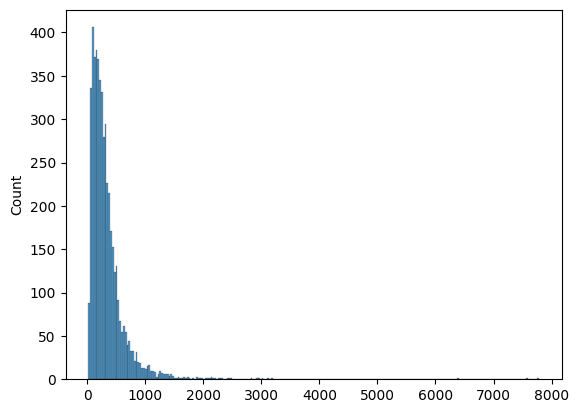

In [8]:
lengths = get_lengths(fasta_file, subset_size=5000) 
_ = sns.histplot(lengths)

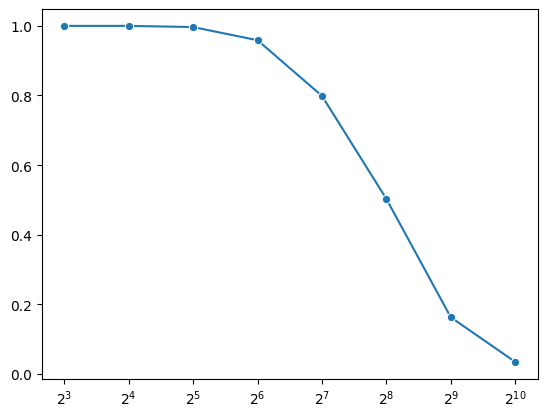

In [12]:
def plot_frac_shorter_than(lengths):
    powers = [2**i for i in range(3, 11)]
    frac_shorter_than = []
    for maxlen in powers:
        frac_shorter_than.append(np.sum(maxlen < lengths) / len(lengths))

    sns.lineplot(x=powers, y=frac_shorter_than, marker='o')
    plt.xticks(powers)
    plt.xscale('log', base=2)
    plt.show()

plot_frac_shorter_than(lengths)


# CATH

Full dataset length: 31885
Subset length: 5000


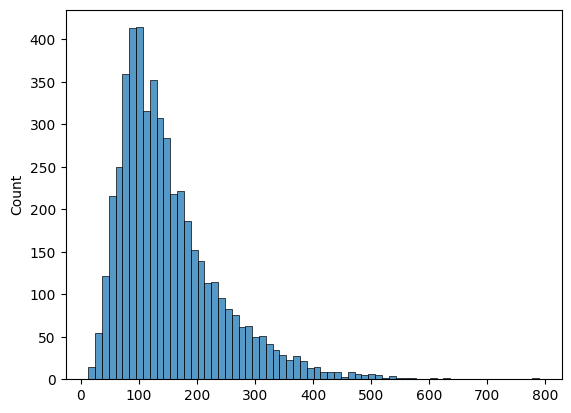

In [13]:
fasta_file: str = "/shared/amyxlu/data/cath/cath-dataset-nonredundant-S40.atom.fa"
lengths = get_lengths(fasta_file, subset_size=5000) 
_ = sns.histplot(lengths)

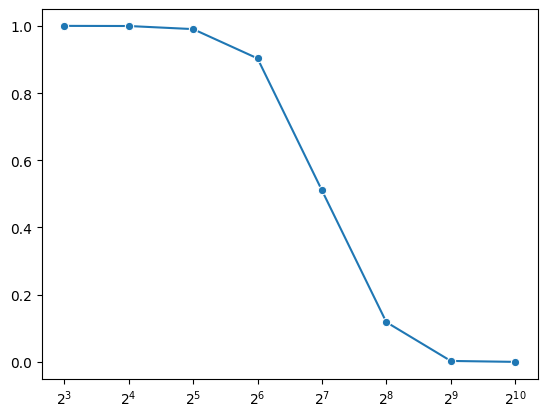

In [14]:
plot_frac_shorter_than(lengths)

# Pfam

100%|██████████| 10.6G/10.6G [12:56<00:00, 14.7MB/s]   
100%|██████████| 10.6G/10.6G [01:11<00:00, 159MB/s]


Full dataset length: 52786549
Subset length: 5000


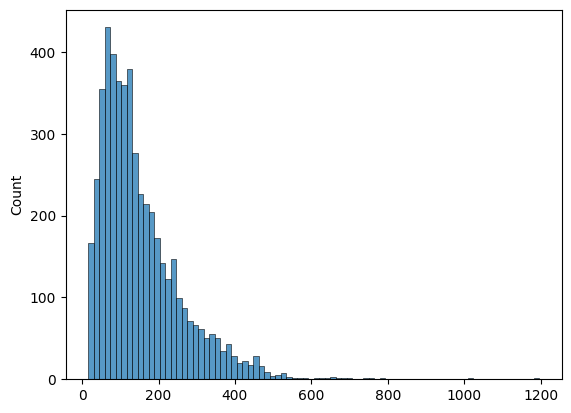

In [18]:
fasta_file: str = "/shared/amyxlu/data/pfam/Pfam-A.fasta"
lengths = get_lengths(fasta_file, subset_size=5000) 
_ = sns.histplot(lengths)

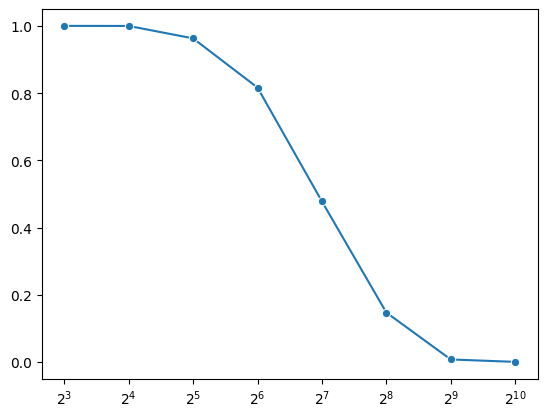

In [19]:
plot_frac_shorter_than(lengths)